In [1]:
import numpy as np
import numpy
import datetime
import pandas as pd
from datetime import datetime
import vaex as vx

In [2]:
import matplotlib.pyplot as plt
from  plotly.offline import iplot
import plotly as py 
import plotly.express as px

In [3]:
import cufflinks as cf 
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [4]:
def convert_to_datetime(date_string):
    return numpy.datetime64(datetime.strptime(str(date_string), '%d/%m/%Y %H:%M:%S'))

def convert_to_date(date_string):
    return numpy.datetime64(datetime.strptime(str(date_string), '%d/%m/%Y'))

def check_wekend(date_string):
    a = datetime.strptime(str(date_string), '%d/%m/%Y')
    weekno = a.weekday()
    if weekno < 5:
        return "Weekday"
    else:  # 5 Sat, 6 Sun
        return "Weekend"
    
def check_month(i):
    if i <= 10:
        return "July-Oct"
    else:
        return "Nov-Dec"
    
def run_preprocess(data):
    data['date_time']  = (data['TICKET DATE'] + ' ' + data['TICKET TIME']).apply(convert_to_datetime)
    data['ticket_date']  = data['TICKET DATE'].apply(convert_to_date)
    data["Day"] = data["date_time"].dt.day_name()
    data["Hour"] = data["date_time"].dt.hour
    data["Month"] = data["date_time"].dt.month
    data['day_type'] = data['TICKET DATE'].apply(check_wekend)
    data['Period'] = data['Month'].apply(check_month)

In [5]:
data = pd.read_csv('717AUP.csv')

In [6]:
run_preprocess(data)

In [7]:
data = data[data['ticket_date'] != '2019-08-15']

In [8]:
data

,MESSAGE_ID,TRIP_ID,ROUTENAME,BUS_ID,ROUTE_ORIGIN_STOP,ROUTE_DESTINATION_STOP,TRIP_START_TIME,TRIP_END_TIME,AMOUNT,USER_COUNT,TICKET DATE,TICKET TIME,date_time,ticket_date,Day,Hour,Month,day_type,Period
0,12434010719055753,T12434010719051302,717AUP,DL1PC6367,Kishan Garh,Mahipal Pur Village,01-JUL-2019 05:13:36,01-JUL-2019 06:22:21,5,1,01/07/2019,05:57:45,2019-07-01 05:57:45,2019-07-01,Monday,5,7,Weekday,July-Oct
1,12434010719055754,T12434010719051302,717AUP,DL1PC6367,Kishan Garh,Mahipal Pur Village,01-JUL-2019 05:13:36,01-JUL-2019 06:22:21,5,1,01/07/2019,05:57:54,2019-07-01 05:57:54,2019-07-01,Monday,5,7,Weekday,July-Oct
2,12434010719055855,T12434010719051302,717AUP,DL1PC6367,Kishan Garh,Mahipal Pur Village,01-JUL-2019 05:13:36,01-JUL-2019 06:22:21,5,1,01/07/2019,05:58:09,2019-07-01 05:58:09,2019-07-01,Monday,5,7,Weekday,July-Oct
3,12434010719055856,T12434010719051302,717AUP,DL1PC6367,Kishan Garh,Mahipal Pur Village,01-JUL-2019 05:13:36,01-JUL-2019 06:22:21,5,1,01/07/2019,05:58:31,2019-07-01 05:58:31,2019-07-01,Monday,5,7,Weekday,July-Oct
4,12434010719055857,T12434010719051302,717AUP,DL1PC6367,Kishan Garh,Mahipal Pur Village,01-JUL-2019 05:13:36,01-JUL-2019 06:22:21,5,1,01/07/2019,05:58:37,2019-07-01 05:58:37,2019-07-01,Monday,5,7,Weekday,July-Oct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2170947,11333291219103256,T11333291219102504,717AUP,DL1PC6350,Badarpur Border,Kapashera Border,29-DEC-2019 10:25:06,29-DEC-2019 11:51:02,15,1,29/12/2019,10:32:27,2019-12-29 10:32:27,2019-12-29,Sunday,10,12,Weekend,Nov-Dec
2170948,11333291219103257,T11333291219102504,717AUP,DL1PC6350,Badarpur Border,Tughalqabad Village,29-DEC-2019 10:25:06,29-DEC-2019 11:51:02,5,1,29/12/2019,10:32:31,2019-12-29 10:32:31,2019-12-29,Sunday,10,12,Weekend,Nov-Dec
2170949,11311291219201613,T11311291219185703,717AUP,DL1PC 6357,Hamdard Nagar / Sangam Vihar,Kapashera Border,29-DEC-2019 18:57:26,29-DEC-2019 21:17:04,15,1,29/12/2019,20:16:45,2019-12-29 20:16:45,2019-12-29,Sunday,20,12,Weekend,Nov-Dec
2170950,11311291219202124,T11311291219185703,717AUP,DL1PC 6357,Hamdard Nagar / Sangam Vihar,Kishan Garh,29-DEC-2019 18:57:26,29-DEC-2019 21:17:04,10,1,29/12/2019,20:21:08,2019-12-29 20:21:08,2019-12-29,Sunday,20,12,Weekend,Nov-Dec


In [9]:
data_grpd = data.groupby(by=['TRIP_ID','ROUTE_ORIGIN_STOP'])[['USER_COUNT']].sum()
data_grpd.reset_index(inplace=True)

In [10]:
trips = data[['TRIP_ID','TRIP_START_TIME']]

In [11]:
trips.drop_duplicates(inplace=True)
trips

,TRIP_ID,TRIP_START_TIME
0,T12434010719051302,01-JUL-2019 05:13:36
18,T12665010719060902,01-JUL-2019 06:09:20
22,T12263010719061602,01-JUL-2019 06:16:04
23,T10679010719062802,01-JUL-2019 06:28:07
40,T12346010719052502,01-JUL-2019 05:25:12
...,...,...
2170206,T10439281219094204,28-DEC-2019 09:42:20
2170225,T11311291219153701,29-DEC-2019 15:37:19
2170235,T11311291219080002,29-DEC-2019 08:00:41
2170262,T10439281219065702,28-DEC-2019 06:57:55


In [12]:
trips[trips['TRIP_ID'] == 'T10006020719062202']

,TRIP_ID,TRIP_START_TIME
14582,T10006020719062202,02-JUL-2019 06:22:40


In [13]:
data_grpd.head(50)

,TRIP_ID,ROUTE_ORIGIN_STOP,USER_COUNT
0,T10006020719062202,Ambedkar Nagar Terminal / DIPSAR,6
1,T10006020719062202,Andheria Bagh More,9
2,T10006020719062202,Badarpur Border,30
3,T10006020719062202,Hamdard Nagar / Sangam Vihar,29
4,T10006020719062202,Kaya Maya Hospital,4
5,T10006020719062202,Kishan Garh,3
6,T10006020719062202,Mahipal Pur Village,29
7,T10006020719062202,Prehlad Pur,12
8,T10006020719062202,Saidul-A-Jab,2
9,T10006020719062202,Tughalqabad Village,2


In [14]:
route_info = pd.read_csv('717AUP_GTFS_stops_latlong.csv')
route_info

,stop_name,stop_lat,stop_lon
0,Badarpur Border,28.492700,77.303817
1,Jaitpur Crossing,28.497217,77.302647
2,Badarpur M B Road / Rajiv Gandhi Stadium,28.499178,77.299004
3,Prehlad Pur,28.500000,77.294633
4,Surajkund Crossing,28.501700,77.291000
5,Lal Kuan,28.502600,77.284517
6,Prem Nagar,28.504400,77.279300
7,Tuglaqabad MB Road,28.505533,77.276483
8,Kaya Maya Hospital,28.508250,77.269017
9,Tughalqabad Village,28.509067,77.265117


In [15]:
occupancy_list = [0]*len(route_info)
stop_list = list(route_info['stop_name'].values)

In [16]:
full_data = data

In [17]:
all_routes = ['717AUP']

In [20]:
from tqdm import tqdm

In [21]:
column_names = ['TRIP_ID','ROUTE_ORIGIN_STOP','ROUTE_DESTINATION_STOP','USER_COUNT']

full_data = full_data[full_data['date_time'] < '2019-10-26']

occupancy_data = []

for r in all_routes:
    
    gtfs_route = pd.read_csv(f"D:\\Dissertation\\Data\\GTFS_with_trip_length\\{r}.csv",index_col='Unnamed: 0')
    stop_order = list(gtfs_route['stop_name'].values)
    
    top_route_data = full_data[full_data['ROUTENAME'] == r]
    
    d = {}
    for c in column_names:
        d[c] = top_route_data[c].values
    top_route_data_pd = pd.DataFrame(d)
    
    for t in tqdm(top_route_data_pd['TRIP_ID'].unique()):
        
        o_dict = {}
        d_dict = {}
        
        single_trip_data = top_route_data_pd[top_route_data_pd['TRIP_ID'] == t]
        o = single_trip_data.groupby(by='ROUTE_ORIGIN_STOP')["USER_COUNT"].sum()
        d = single_trip_data.groupby(by='ROUTE_DESTINATION_STOP')["USER_COUNT"].sum()
        for s in o.index:
            o_dict[s] = o_dict.get(s,0) + o[s]
        for s in d.index:
            d_dict[s] = d_dict.get(s,0) - d[s]
        
        temp = []
        count = 0
        temp.append(t)
        
        for i in stop_order:
            temp.append(count)
            count += o_dict.get(i,0)
            count += d_dict.get(i,0)
            
        occupancy_data.append(temp)
        
    column = ['TRIP_ID'] + stop_order
    occupancy_df = pd.DataFrame(occupancy_data,columns=column)
    
    trips = data[['TRIP_ID','TRIP_START_TIME']]
    trips.drop_duplicates(inplace=True)

    def trip_time_finder(t):
        return trips[trips['TRIP_ID'] == t]['TRIP_START_TIME'].values[0]

    ggg = occupancy_df['TRIP_ID'].apply(trip_time_finder)
    occupancy_df.insert(1,'trip_start_time',ggg)

100%|████████████████████████████████████████████████████████████████████████████| 14402/14402 [15:58<00:00, 15.03it/s]


In [22]:
def convert_to_datetime(date_string):
    return numpy.datetime64(datetime.strptime(str(date_string), '%d-%m-%Y %H:%M:%S'))

def convert_to_date(date_string):
    return numpy.datetime64(datetime.strptime(str(date_string), '%d/%m/%Y'))

def check_wekend(date_string):
    a = datetime.strptime(str(date_string), '%d/%m/%Y')
    weekno = a.weekday()
    if weekno < 5:
        return "Weekday"
    else:  # 5 Sat, 6 Sun
        return "Weekend"
    
def check_month(i):
    if i <= 10:
        return "July-Oct"
    else:
        return "Nov-Dec"
    
def run_preprocess(data):
    data['date_time']  = data['date_time'].apply(convert_to_datetime)
#     data['ticket_date']  = data['TICKET DATE'].apply(convert_to_date)
    data["Day"] = data["date_time"].dt.day_name()
    data["Hour"] = data["date_time"].dt.hour
    data["Month"] = data["date_time"].dt.month
#     data['day_type'] = data['TICKET DATE'].apply(check_wekend)
#     data['Period'] = data['Month'].apply(check_month)

In [23]:
months = ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
dic = {months[i]:i+1 for i in range(12)}
def month_indexer(d):
    temp = d.split('-')[1]
    new_d= d.replace(temp,str(dic[temp]))
    return new_d

In [24]:
occupancy_df['date_time'] = occupancy_df['trip_start_time'].apply(month_indexer)

In [25]:
run_preprocess(occupancy_df)

In [7]:
occupancy_df

,TRIP_ID,trip_start_time,Badarpur Border,Jaitpur Crossing,Badarpur M B Road / Rajiv Gandhi Stadium,Prehlad Pur,Surajkund Crossing,Lal Kuan,Prem Nagar,Tuglaqabad MB Road,...,Shiv Murti / Dwarka More,Samalkha Crossing,Samalkha Village,Kapashera Crossing,Kapashera Village,Kapashera Border,date_time,Day,Hour,Month
0,T12434010719051302,01-JUL-2019 05:13:36,0,12,12,12,25,25,25,25,...,43,43,43,42,32,32,2019-07-01 05:13:36,Monday,5,7
1,T12665010719060902,01-JUL-2019 06:09:20,0,19,19,19,31,31,31,31,...,60,60,60,57,43,43,2019-07-01 06:09:20,Monday,6,7
2,T12263010719061602,01-JUL-2019 06:16:04,0,32,32,32,32,32,32,32,...,57,57,57,56,46,46,2019-07-01 06:16:04,Monday,6,7
3,T10679010719062802,01-JUL-2019 06:28:07,0,21,21,21,45,45,45,45,...,45,45,45,46,39,39,2019-07-01 06:28:07,Monday,6,7
4,T12346010719052502,01-JUL-2019 05:25:12,0,18,18,18,24,24,24,24,...,38,38,38,38,34,34,2019-07-01 05:25:12,Monday,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14397,T11015251019124001,25-OCT-2019 12:40:56,0,27,27,27,39,39,39,39,...,46,45,45,41,39,39,2019-10-25 12:40:56,Friday,12,10
14398,T12463251019084904,25-OCT-2019 08:49:08,0,41,41,41,69,69,69,69,...,44,44,44,43,42,42,2019-10-25 08:49:08,Friday,8,10
14399,T12463251019180203,25-OCT-2019 18:02:13,0,2,2,2,12,12,12,12,...,43,43,43,32,26,26,2019-10-25 18:02:13,Friday,18,10
14400,T12463251019055302,25-OCT-2019 05:53:21,0,6,6,6,14,14,14,14,...,52,52,52,53,42,42,2019-10-25 05:53:21,Friday,5,10


In [27]:
occupancy_df.to_csv('717AUP_bus_occupancy.csv',index=False)

# ANN

In [6]:
occupancy_df = pd.read_csv('717AUP_bus_occupancy.csv')

In [59]:
time_data = occupancy_df['Prem Nagar'].values

In [60]:
time_data = time_data.reshape((len(time_data),1))
time_data

array([[25],
       [31],
       [32],
       ...,
       [12],
       [14],
       [20]], dtype=int64)

In [61]:
len(time_data)

14402

In [62]:
train_data = time_data[:13402]
test_data = time_data[13402:]

In [63]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
train_data_scaled = sc.fit_transform(train_data)
test_data_scaled = sc.transform(test_data)

In [64]:
def create_lstm_input(data, look_back):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back)])
        Y.append(data[i + look_back])
    return np.array(X), np.array(Y)

In [65]:
look_back = 50
train_X, train_Y = create_lstm_input(train_data_scaled, look_back)
test_X, test_Y = create_lstm_input(test_data_scaled, look_back)

In [66]:
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1]))

In [67]:
import tensorflow as tf

In [69]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=50, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=128, activation='relu'))
ann.add(tf.keras.layers.Dense(units=128, activation='relu'))
ann.add(tf.keras.layers.Dense(units=128, activation='relu'))
ann.add(tf.keras.layers.Dense(units=128, activation='relu'))
ann.add(tf.keras.layers.Dense(units=128, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=32, activation='relu'))
ann.add(tf.keras.layers.Dense(units=16, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1))
ann.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4), loss = 'mean_squared_error',metrics=['mae','mse','mape','accuracy'])
model.summary()
history = ann.fit(train_X, train_Y,validation_data=(test_X, test_Y), batch_size = 32, epochs = 100)


Epoch 1/100
418/418 [==============================] - 11s 22ms/step - loss: 0.0500 - mae: 0.1775 - mse: 0.0500 - mape: 1218904.3750 - accuracy: 0.0055 - val_loss: 0.0440 - val_mae: 0.1693 - val_mse: 0.0440 - val_mape: 1256350.7500 - val_accuracy: 0.0042
Epoch 2/100
418/418 [==============================] - 8s 20ms/step - loss: 0.0368 - mae: 0.1559 - mse: 0.0368 - mape: 1598333.1250 - accuracy: 0.0055 - val_loss: 0.0410 - val_mae: 0.1639 - val_mse: 0.0410 - val_mape: 1287797.5000 - val_accuracy: 0.0042
Epoch 3/100
418/418 [==============================] - 8s 19ms/step - loss: 0.0352 - mae: 0.1533 - mse: 0.0352 - mape: 1647557.3750 - accuracy: 0.0055 - val_loss: 0.0394 - val_mae: 0.1611 - val_mse: 0.0394 - val_mape: 1318404.2500 - val_accuracy: 0.0042
Epoch 4/100
418/418 [==============================] - 8s 19ms/step - loss: 0.0346 - mae: 0.1524 - mse: 0.0346 - mape: 1676989.0000 - accuracy: 0.0055 - val_loss: 0.0386 - val_mae: 0.1597 - val_mse: 0.0386 - val_mape: 1336412.8750 - val_

KeyboardInterrupt: 

30/30 [==============================] - 0s 2ms/step


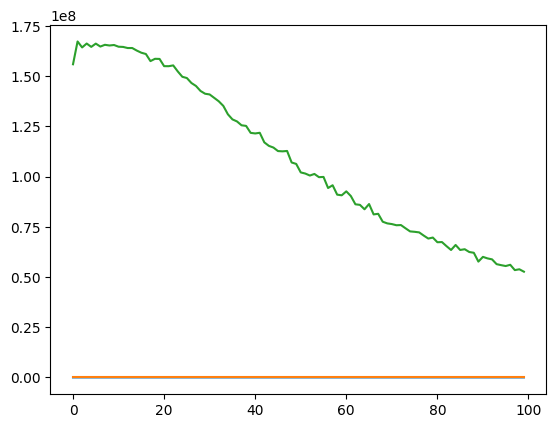

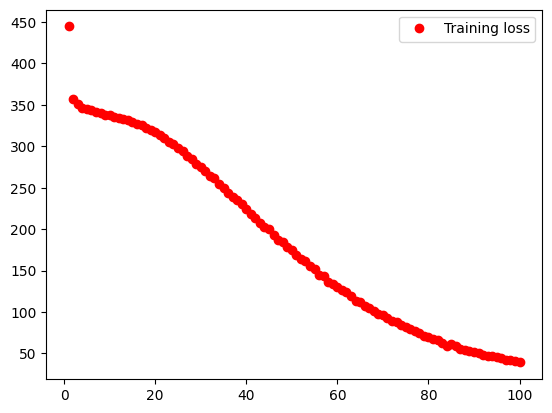

30/30 [==============================] - 0s 1ms/step


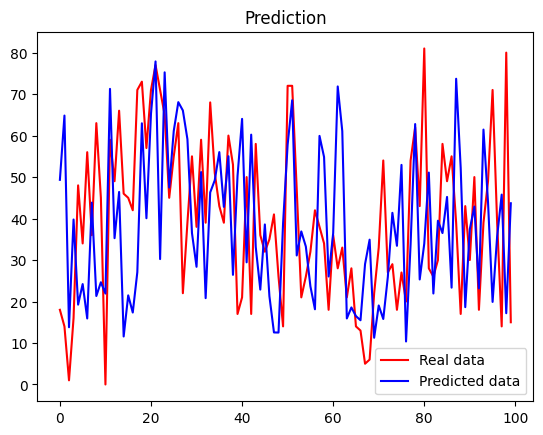

In [42]:
y_pred = ann.predict(test_X)
np.set_printoptions()
# print(np.concatenate((y_pred.reshape(len(y_pred),1), test_Y.reshape(len(test_Y),1)),1))

from matplotlib import pyplot

loss = history.history['loss']
acc = history.history['mae']
val_loss = history.history['val_loss']
val_acc = history.history['val_mae']
mape_loss=history.history['mape']
pyplot.plot(history.history['mse'])
pyplot.plot(history.history['mae'])
pyplot.plot(history.history['mape'])
pyplot.show()

epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.legend()
plt.show()

y_pred = ann.predict(test_X)

plt.plot(test_Y[:100], color = 'red', label = 'Real data')
plt.plot(y_pred[:100], color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [43]:
y_test1 = list(test_Y)
y_pred1 = list(y_pred)

from sklearn.metrics import r2_score
score = r2_score(y_test1, y_pred1)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is -70.0%


# LSTM

In [52]:
occupancy_df = pd.read_csv('717AUP_bus_occupancy.csv')
time_data = occupancy_df['Prem Nagar'].values
time_data = time_data.reshape((len(time_data),1))

In [53]:
len(time_data)

14402

In [54]:
time_data

array([[25],
       [31],
       [32],
       ...,
       [12],
       [14],
       [20]], dtype=int64)

In [55]:
train_data = time_data[:13402]
test_data = time_data[13402:]

In [56]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
train_data_scaled = sc.fit_transform(train_data)
test_data_scaled = sc.transform(test_data)

In [57]:
def create_lstm_input(data, look_back):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back+1)])
        Y.append(data[i + look_back])
    return np.array(X), np.array(Y)

In [58]:
look_back = 50
train_X, train_Y = create_lstm_input(train_data_scaled, look_back)
test_X, test_Y = create_lstm_input(test_data_scaled, look_back)

In [59]:
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))

In [60]:
train_X.shape

(13352, 51, 1)

In [61]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras import layers
import tensorflow as tf
import keras

In [62]:
regressor = Sequential()
regressor.add(LSTM(units = 64, return_sequences = True, input_shape = (train_X.shape[1], 1)))
regressor.add(BatchNormalization())
# regressor.add(LSTM(units = 64,return_sequences = True))
# regressor.add(BatchNormalization())
regressor.add(LSTM(units = 32))
regressor.add(BatchNormalization())
regressor.add(tf.keras.layers.Dense(units=8))
regressor.add(tf.keras.layers.Dense(units=1))

regressor.compile(loss='mse', optimizer=keras.optimizers.Adam(), metrics=['mae','mse','mape'])
regressor.summary()
history=regressor.fit(train_X, train_Y, epochs=10, batch_size=16, validation_data=(test_X, test_Y))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 51, 64)            16896     
                                                                 
 batch_normalization_6 (Batc  (None, 51, 64)           256       
 hNormalization)                                                 
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 batch_normalization_7 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_9 (Dense)             (None, 8)                 264       
                                                                 
 dense_10 (Dense)            (None, 1)                

30/30 [==============================] - 1s 23ms/step


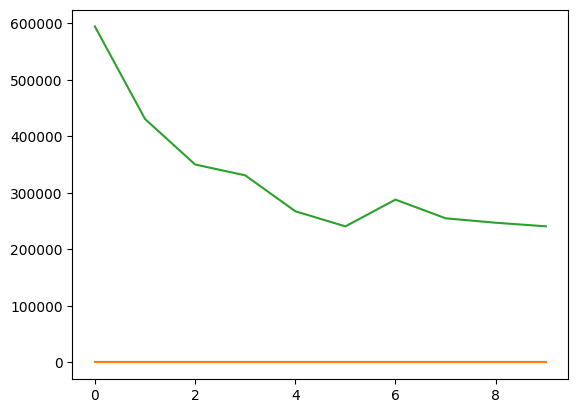

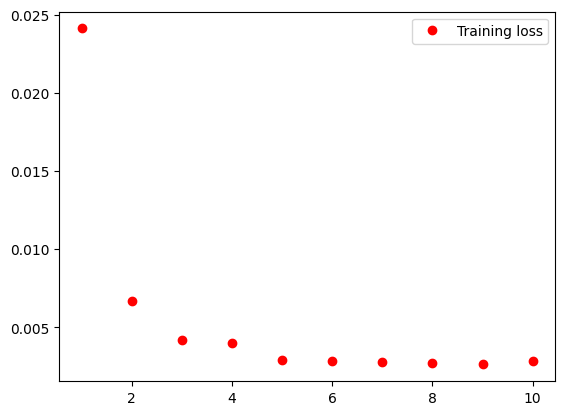

30/30 [==============================] - 1s 22ms/step


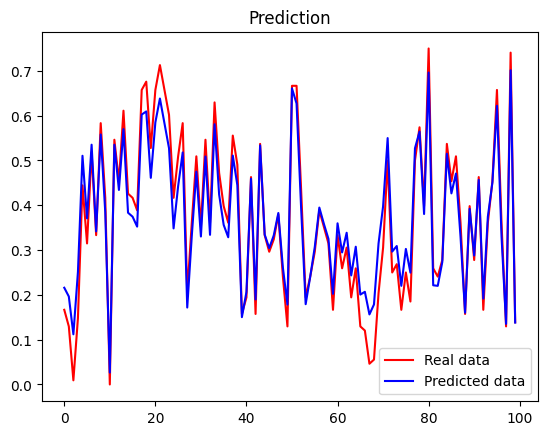

In [63]:
y_pred = regressor.predict(test_X)
np.set_printoptions()
from matplotlib import pyplot

loss = history.history['loss']
acc = history.history['mae']
val_loss = history.history['val_loss']
val_acc = history.history['val_mae']
mape_loss=history.history['mape']
pyplot.plot(history.history['mse'])
pyplot.plot(history.history['mae'])
pyplot.plot(history.history['mape'])
pyplot.show()

epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.legend()
plt.show()

y_pred = regressor.predict(test_X)

plt.plot(test_Y[:100], color = 'red', label = 'Real data')
plt.plot(y_pred[:100], color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [64]:
predicted_occupancy = regressor.predict(test_X)

30/30 [==============================] - 1s 21ms/step


In [65]:
predicted_occupancy = sc.inverse_transform(predicted_occupancy)
test_Y = sc.inverse_transform(test_Y)

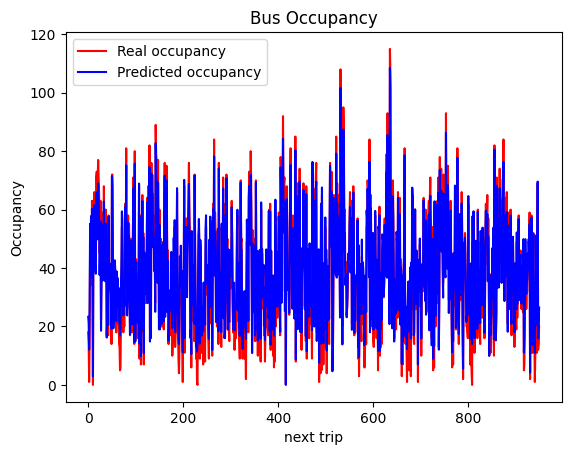

In [66]:
plt.plot(test_Y[:], color = 'red', label = 'Real occupancy')
plt.plot(predicted_occupancy[:], color = 'blue', label = 'Predicted occupancy')
plt.title('Bus Occupancy')
plt.xlabel('next trip')
plt.ylabel('Occupancy')
plt.legend()
plt.show()

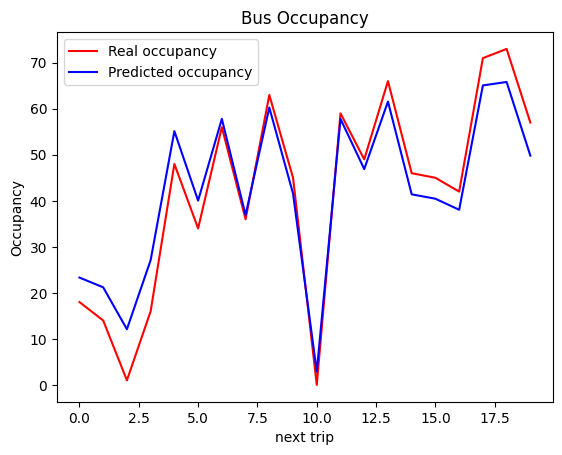

In [67]:
plt.plot(test_Y[:20], color = 'red', label = 'Real occupancy')
plt.plot(predicted_occupancy[:20], color = 'blue', label = 'Predicted occupancy')
plt.title('Bus Occupancy')
plt.xlabel('next trip')
plt.ylabel('Occupancy')
plt.legend()
plt.show()

In [68]:
y_test1 = list(test_Y)
y_pred1 = list(predicted_occupancy)

from sklearn.metrics import r2_score
score = r2_score(y_test1, y_pred1)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 94.0%


In [167]:
occupancy_df

,TRIP_ID,trip_start_time,Badarpur Border,Jaitpur Crossing,Badarpur M B Road / Rajiv Gandhi Stadium,Prehlad Pur,Surajkund Crossing,Lal Kuan,Prem Nagar,Tuglaqabad MB Road,...,Shiv Murti / Dwarka More,Samalkha Crossing,Samalkha Village,Kapashera Crossing,Kapashera Village,Kapashera Border,date_time,Day,Hour,Month
0,T12434010719051302,01-JUL-2019 05:13:36,0,12,12,12,25,25,25,25,...,43,43,43,42,32,32,2019-07-01 05:13:36,Monday,5,7
1,T12665010719060902,01-JUL-2019 06:09:20,0,19,19,19,31,31,31,31,...,60,60,60,57,43,43,2019-07-01 06:09:20,Monday,6,7
2,T12263010719061602,01-JUL-2019 06:16:04,0,32,32,32,32,32,32,32,...,57,57,57,56,46,46,2019-07-01 06:16:04,Monday,6,7
3,T10679010719062802,01-JUL-2019 06:28:07,0,21,21,21,45,45,45,45,...,45,45,45,46,39,39,2019-07-01 06:28:07,Monday,6,7
4,T12346010719052502,01-JUL-2019 05:25:12,0,18,18,18,24,24,24,24,...,38,38,38,38,34,34,2019-07-01 05:25:12,Monday,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14397,T11015251019124001,25-OCT-2019 12:40:56,0,27,27,27,39,39,39,39,...,46,45,45,41,39,39,2019-10-25 12:40:56,Friday,12,10
14398,T12463251019084904,25-OCT-2019 08:49:08,0,41,41,41,69,69,69,69,...,44,44,44,43,42,42,2019-10-25 08:49:08,Friday,8,10
14399,T12463251019180203,25-OCT-2019 18:02:13,0,2,2,2,12,12,12,12,...,43,43,43,32,26,26,2019-10-25 18:02:13,Friday,18,10
14400,T12463251019055302,25-OCT-2019 05:53:21,0,6,6,6,14,14,14,14,...,52,52,52,53,42,42,2019-10-25 05:53:21,Friday,5,10


# LSTM+ANN

In [292]:
list(occupancy_df.columns[2:9])

['Badarpur Border',
 'Jaitpur Crossing',
 'Badarpur M B Road / Rajiv Gandhi Stadium',
 'Prehlad Pur',
 'Surajkund Crossing',
 'Lal Kuan',
 'Prem Nagar']

In [293]:
occupancy_df = pd.read_csv('717AUP_bus_occupancy.csv')
# time_data = occupancy_df[list(occupancy_df.columns[2:9])].values
# time_data = time_data.reshape((time_data.shape[0],time_data.shape[1],1))

In [294]:
occupancy_df

,TRIP_ID,trip_start_time,Badarpur Border,Jaitpur Crossing,Badarpur M B Road / Rajiv Gandhi Stadium,Prehlad Pur,Surajkund Crossing,Lal Kuan,Prem Nagar,Tuglaqabad MB Road,...,Shiv Murti / Dwarka More,Samalkha Crossing,Samalkha Village,Kapashera Crossing,Kapashera Village,Kapashera Border,date_time,Day,Hour,Month
0,T12434010719051302,01-JUL-2019 05:13:36,0,12,12,12,25,25,25,25,...,43,43,43,42,32,32,2019-07-01 05:13:36,Monday,5,7
1,T12665010719060902,01-JUL-2019 06:09:20,0,19,19,19,31,31,31,31,...,60,60,60,57,43,43,2019-07-01 06:09:20,Monday,6,7
2,T12263010719061602,01-JUL-2019 06:16:04,0,32,32,32,32,32,32,32,...,57,57,57,56,46,46,2019-07-01 06:16:04,Monday,6,7
3,T10679010719062802,01-JUL-2019 06:28:07,0,21,21,21,45,45,45,45,...,45,45,45,46,39,39,2019-07-01 06:28:07,Monday,6,7
4,T12346010719052502,01-JUL-2019 05:25:12,0,18,18,18,24,24,24,24,...,38,38,38,38,34,34,2019-07-01 05:25:12,Monday,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14397,T11015251019124001,25-OCT-2019 12:40:56,0,27,27,27,39,39,39,39,...,46,45,45,41,39,39,2019-10-25 12:40:56,Friday,12,10
14398,T12463251019084904,25-OCT-2019 08:49:08,0,41,41,41,69,69,69,69,...,44,44,44,43,42,42,2019-10-25 08:49:08,Friday,8,10
14399,T12463251019180203,25-OCT-2019 18:02:13,0,2,2,2,12,12,12,12,...,43,43,43,32,26,26,2019-10-25 18:02:13,Friday,18,10
14400,T12463251019055302,25-OCT-2019 05:53:21,0,6,6,6,14,14,14,14,...,52,52,52,53,42,42,2019-10-25 05:53:21,Friday,5,10


In [295]:
cols = list(occupancy_df.columns[2:9])
df = occupancy_df[cols]

In [296]:
df

,Badarpur Border,Jaitpur Crossing,Badarpur M B Road / Rajiv Gandhi Stadium,Prehlad Pur,Surajkund Crossing,Lal Kuan,Prem Nagar
0,0,12,12,12,25,25,25
1,0,19,19,19,31,31,31
2,0,32,32,32,32,32,32
3,0,21,21,21,45,45,45
4,0,18,18,18,24,24,24
...,...,...,...,...,...,...,...
14397,0,27,27,27,39,39,39
14398,0,41,41,41,69,69,69
14399,0,2,2,2,12,12,12
14400,0,6,6,6,14,14,14


In [297]:
sc1 = MinMaxScaler()
df.loc[:,cols] = sc1.fit_transform(df.loc[:,cols])

C:\Users\Jatin\AppData\Local\Temp\11\ipykernel_74144\877936439.py:2: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



In [298]:
df

,Badarpur Border,Jaitpur Crossing,Badarpur M B Road / Rajiv Gandhi Stadium,Prehlad Pur,Surajkund Crossing,Lal Kuan,Prem Nagar
0,0.0,0.137931,0.137931,0.137931,0.217391,0.217391,0.217391
1,0.0,0.218391,0.218391,0.218391,0.269565,0.269565,0.269565
2,0.0,0.367816,0.367816,0.367816,0.278261,0.278261,0.278261
3,0.0,0.241379,0.241379,0.241379,0.391304,0.391304,0.391304
4,0.0,0.206897,0.206897,0.206897,0.208696,0.208696,0.208696
...,...,...,...,...,...,...,...
14397,0.0,0.310345,0.310345,0.310345,0.339130,0.339130,0.339130
14398,0.0,0.471264,0.471264,0.471264,0.600000,0.600000,0.600000
14399,0.0,0.022989,0.022989,0.022989,0.104348,0.104348,0.104348
14400,0.0,0.068966,0.068966,0.068966,0.121739,0.121739,0.121739


In [299]:
def df_to_X_y1(df_temp, window_size=100):
  df_as_np = df_temp.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][-1]
    y.append(label)
  return np.array(X), np.array(y)

In [300]:
X1, y1 = df_to_X_y1(df)
X1.shape, y1.shape

((14302, 100, 7), (14302,))

In [301]:
y1

array([0.33043478, 0.45217391, 0.20869565, ..., 0.10434783, 0.12173913,
       0.17391304])

In [302]:
# train_data = time_data[:13402]
# test_data = time_data[13402:]

X1_train, y1_train = X1[:13000], y1[:13000]
X1_test, y1_test = X1[13000:13500], y1[13000:13500]
X1_val, y1_val = X1[13500:], y1[13500:]
X1_train.shape, y1_train.shape, X1_val.shape, y1_val.shape, X1_test.shape, y1_test.shape

((13000, 100, 7), (13000,), (802, 100, 7), (802,), (500, 100, 7), (500,))

In [303]:
# from sklearn.preprocessing import MinMaxScaler
# sc = MinMaxScaler(feature_range = (0, 1))
# train_data_scaled = sc.fit_transform(train_data)
# test_data_scaled = sc.transform(test_data)

In [304]:
# def create_lstm_input(data, look_back):
#     X, Y = [], []
#     for i in range(len(data) - look_back):
#         X.append(data[i:(i + look_back)])
#         Y.append(data[i + look_back])
#     return np.array(X), np.array(Y)

In [305]:
# look_back = 8
# train_X, train_Y = create_lstm_input(train_data_scaled, look_back)
# test_X, test_Y = create_lstm_input(test_data_scaled, look_back)

In [306]:
# train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))
# test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))

In [307]:
# train_X

In [308]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import BatchNormalization
import tensorflow as tf
import keras
from keras import layers

In [309]:
# train_X.shape

In [311]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler

In [312]:
X1_train.shape

(13000, 100, 7)

In [313]:
# model = Sequential()
# model.add(LSTM(units = 64, return_sequences = True, input_shape = (X1_train.shape[1], X1_train.shape[2])))
# model.add(BatchNormalization())
# model.add(LSTM(units = 32, return_sequences = False))
# model.add(BatchNormalization())
# model.add(tf.keras.layers.Dense(units=8, activation='relu'))
# model.add(BatchNormalization())
# model.add(tf.keras.layers.Dense(units=1))
# model.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=1e-4))
# cp1 = ModelCheckpoint('model', save_best_only=True)
# history = model.fit(X1_train, y1_train, validation_data=(X1_val, y1_val), epochs=10, callbacks=[cp1])

In [314]:
model1 = Sequential()
model1.add(InputLayer((X1_train.shape[1], X1_train.shape[2])))
model1.add(LSTM(64,return_sequences = True))
model1.add(LSTM(32, return_sequences = False))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'relu'))

model1.summary()

cp1 = ModelCheckpoint('model1', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_40 (LSTM)              (None, 100, 64)           18432     
                                                                 
 lstm_41 (LSTM)              (None, 32)                12416     
                                                                 
 dense_67 (Dense)            (None, 8)                 264       
                                                                 
 dense_68 (Dense)            (None, 1)                 9         
                                                                 
Total params: 31,121
Trainable params: 31,121
Non-trainable params: 0
_________________________________________________________________


In [315]:
model1.fit(X1_train, y1_train, validation_data=(X1_val, y1_val), epochs=10, callbacks=[cp1])

Epoch 1/10
407/407 [==============================] - ETA: 0s - loss: 0.0273 - root_mean_squared_error: 0.1654

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


407/407 [==============================] - 99s 235ms/step - loss: 0.0273 - root_mean_squared_error: 0.1654 - val_loss: 0.0291 - val_root_mean_squared_error: 0.1707
Epoch 2/10
407/407 [==============================] - ETA: 0s - loss: 0.0263 - root_mean_squared_error: 0.1621

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


407/407 [==============================] - 92s 225ms/step - loss: 0.0263 - root_mean_squared_error: 0.1621 - val_loss: 0.0286 - val_root_mean_squared_error: 0.1690
Epoch 3/10
407/407 [==============================] - 89s 218ms/step - loss: 0.0262 - root_mean_squared_error: 0.1617 - val_loss: 0.0291 - val_root_mean_squared_error: 0.1705
Epoch 4/10
407/407 [==============================] - 87s 214ms/step - loss: 0.0261 - root_mean_squared_error: 0.1615 - val_loss: 0.0288 - val_root_mean_squared_error: 0.1696
Epoch 5/10
407/407 [==============================] - 86s 211ms/step - loss: 0.0260 - root_mean_squared_error: 0.1612 - val_loss: 0.0291 - val_root_mean_squared_error: 0.1705
Epoch 6/10
407/407 [==============================] - ETA: 0s - loss: 0.0260 - root_mean_squared_error: 0.1611

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


407/407 [==============================] - 92s 226ms/step - loss: 0.0260 - root_mean_squared_error: 0.1611 - val_loss: 0.0284 - val_root_mean_squared_error: 0.1687
Epoch 7/10
407/407 [==============================] - ETA: 0s - loss: 0.0259 - root_mean_squared_error: 0.1610

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


407/407 [==============================] - 110s 271ms/step - loss: 0.0259 - root_mean_squared_error: 0.1610 - val_loss: 0.0282 - val_root_mean_squared_error: 0.1678
Epoch 8/10
407/407 [==============================] - 102s 251ms/step - loss: 0.0259 - root_mean_squared_error: 0.1609 - val_loss: 0.0282 - val_root_mean_squared_error: 0.1679
Epoch 9/10
407/407 [==============================] - 104s 255ms/step - loss: 0.0259 - root_mean_squared_error: 0.1608 - val_loss: 0.0287 - val_root_mean_squared_error: 0.1696
Epoch 10/10
407/407 [==============================] - ETA: 0s - loss: 0.0258 - root_mean_squared_error: 0.1607

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


407/407 [==============================] - 108s 266ms/step - loss: 0.0258 - root_mean_squared_error: 0.1607 - val_loss: 0.0281 - val_root_mean_squared_error: 0.1676


In [316]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y):
    predictions = model.predict(X).flatten()
    df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
    df[:].plot()
    return df, mse(y, predictions)

26/26 [==============================] - 3s 84ms/step


(     Predictions   Actuals
 0       0.471641  0.443478
 1       0.452505  0.200000
 2       0.406236  0.521739
 3       0.411277  0.173913
 4       0.366399  0.365217
 ..           ...       ...
 797     0.255301  0.339130
 798     0.269800  0.600000
 799     0.316563  0.104348
 800     0.297699  0.121739
 801     0.275989  0.173913
 
 [802 rows x 2 columns],
 0.0281030792607713)

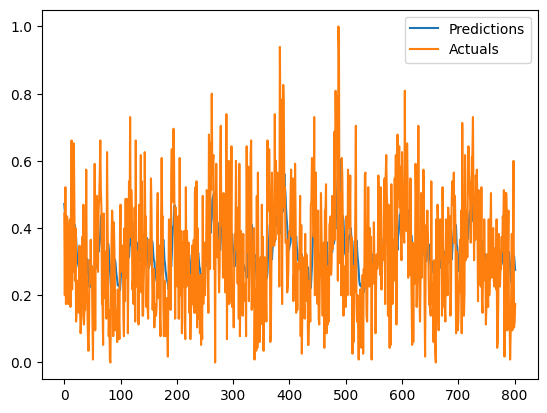

In [317]:
plot_predictions1(model1, X1_val, y1_val)

16/16 [==============================] - 1s 86ms/step


(     Predictions   Actuals
 0       0.291437  0.339130
 1       0.300372  0.139130
 2       0.284488  0.234783
 3       0.279573  0.339130
 4       0.286472  0.200000
 ..           ...       ...
 495     0.433873  0.686957
 496     0.467265  0.669565
 497     0.501750  0.504348
 498     0.491956  0.365217
 499     0.454298  0.669565
 
 [500 rows x 2 columns],
 0.026424693990974493)

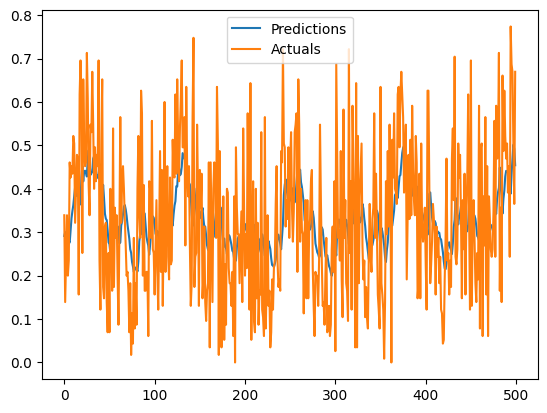

In [318]:
plot_predictions1(model1, X1_test, y1_test)

In [111]:
# y_pred = model.predict(test_X)
# np.set_printoptions()
# # print(np.concatenate((y_pred.reshape(len(y_pred),1), test_Y.reshape(len(test_Y),1)),1))

# from matplotlib import pyplot

# loss = history.history['loss']
# # acc = history.history['mae']
# val_loss = history.history['val_loss']
# # val_acc = history.history['val_mae']
# # mape_loss=history.history['mape']
# # pyplot.plot(history.history['mse'])
# # pyplot.plot(history.history['mae'])
# # pyplot.plot(history.history['mape'])
# pyplot.show()

# epochs = range(1, len(loss)+1)
# plt.plot(epochs, loss, 'ro', label='Training loss')
# plt.legend()
# plt.show()

# y_pred = model.predict(test_X)

# plt.plot(test_Y[:100], color = 'red', label = 'Real data')
# plt.plot(y_pred[:100], color = 'blue', label = 'Predicted data')
# plt.title('Prediction')
# plt.legend()
# plt.show()

In [140]:
# predicted_occupancy = sc.inverse_transform(model.predict(test_X))
predicted_occupancy = (model.predict(test_X))

31/31 [==============================] - 1s 11ms/step


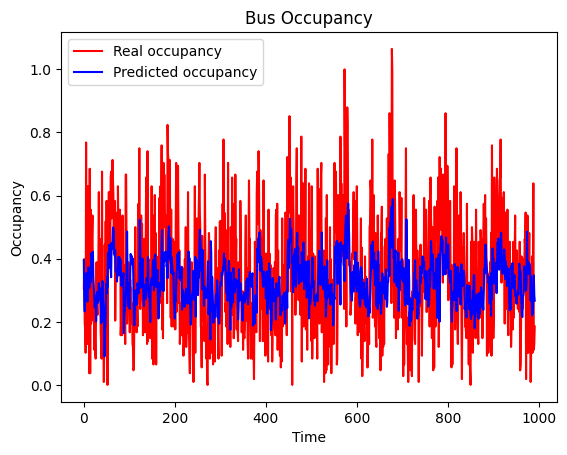

In [141]:
# plt.plot(sc.inverse_transform(test_Y)[:], color = 'red', label = 'Real occupancy')
plt.plot((test_Y)[:], color = 'red', label = 'Real occupancy')
plt.plot(predicted_occupancy[:], color = 'blue', label = 'Predicted occupancy')
plt.title('Bus Occupancy')
plt.xlabel('Time')
plt.ylabel('Occupancy')
plt.legend()
plt.show()

In [142]:
# y_test1 = list(sc.inverse_transform(test_Y))
y_test1 = list((test_Y))
y_pred1 = list(predicted_occupancy)

from sklearn.metrics import r2_score
score = r2_score(y_test1, y_pred1)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 2.0%
